In [2]:
import pandas as pd
import numpy as np

df=pd.read_csv(r"C:\Users\Parth Trivedi\Desktop\CODING\MachineLearning\interview-chances-predictor\data\raw\placementdata.csv")
df.columns = df.columns.str.strip().str.replace('\u00a0', '', regex=False)
target = "PlacementStatus"


#so accordin to the analysis these our our final parameters on which we'll be training our data also we hav removed HSC and SSC as CGPA denotes the present academics and somewhere or the other they are already affecting our CGPA

In [3]:
final_features=[
    "AptitudeTestScore",
        "Projects",
        "SoftSkillsRating",
        "CGPA",
        "ExtracurricularActivities",
        "Workshops/Certifications",
        "PlacementTraining",
        "Internships"
]
X= df[final_features] #input features
y= df[target] #output label

X.head()

,AptitudeTestScore,Projects,SoftSkillsRating,CGPA,ExtracurricularActivities,Workshops/Certifications,PlacementTraining,Internships
0,65,1,4.4,7.5,No,1,No,1
1,90,3,4.0,8.9,Yes,2,Yes,0
2,82,2,4.8,7.3,Yes,2,No,1
3,85,1,4.4,7.5,Yes,2,Yes,1
4,86,2,4.5,8.3,Yes,2,Yes,1


In [4]:
#mapping the float data to integer so that our data can understand basically ENCODING (object to int)
X.dtypes

AptitudeTestScore              int64
Projects                       int64
SoftSkillsRating             float64
CGPA                         float64
ExtracurricularActivities     object
Workshops/Certifications       int64
PlacementTraining             object
Internships                    int64
dtype: object

ExtracurricularActivities     object
PlacementTraining             object
Need to be changed to integer

In [5]:
#mapping/encoding object to int Encode Binary Categorical Feature
#alsoo we have used .map() and not one-hot as for binary it would add unnecessary columns and we can easiely convert binary varibles using map
X=X.copy()
X["PlacementTraining"]=X["PlacementTraining"].map({
    "Yes":1,
    "No":0
})

X["ExtracurricularActivities"]=X["ExtracurricularActivities"].map({
    "Yes":1,
    "No":0
})
X.dtypes

AptitudeTestScore              int64
Projects                       int64
SoftSkillsRating             float64
CGPA                         float64
ExtracurricularActivities      int64
Workshops/Certifications       int64
PlacementTraining              int64
Internships                    int64
dtype: object

In [6]:
y.head()

0    NotPlaced
1       Placed
2    NotPlaced
3       Placed
4       Placed
Name: PlacementStatus, dtype: object

In [7]:
#we also need to encode our target label 'y'
y=y.map({
    "Placed":1,
    "NotPlaced":0
})
y.dtypes

dtype('int64')

In [8]:
X.head()

,AptitudeTestScore,Projects,SoftSkillsRating,CGPA,ExtracurricularActivities,Workshops/Certifications,PlacementTraining,Internships
0,65,1,4.4,7.5,0,1,0,1
1,90,3,4.0,8.9,1,2,1,0
2,82,2,4.8,7.3,1,2,0,1
3,85,1,4.4,7.5,1,2,1,1
4,86,2,4.5,8.3,1,2,1,1


In [9]:
y.head()

0    0
1    1
2    0
3    1
4    1
Name: PlacementStatus, dtype: int64

In [10]:
X.isnull().sum()

AptitudeTestScore            0
Projects                     0
SoftSkillsRating             0
CGPA                         0
ExtracurricularActivities    0
Workshops/Certifications     0
PlacementTraining            0
Internships                  0
dtype: int64

## Data Preparation Summary

- Final feature set selected based on correlation and domain reasoning.
- Binary categorical variables were encoded numerically.
- Target variable was converted to binary format.
- Dataset is now fully numeric and ready for train–test split.


TRAIN TEST SPLIT

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.2, random_state=42, stratify=y
)
# test_size=0.2 → 80% train, 20% test
# random_state=42 → reproducibility
# stratify=y → keeps placement ratio same in train & test

#strarify to preserve the ratio of number of placed and unplaced ration same in training and testing dataset
X_test["Internships"].value_counts()


Internships
1    1101
2     488
0     411
Name: count, dtype: int64

In [12]:
y_test.value_counts(normalize=True)


PlacementStatus
0    0.5805
1    0.4195
Name: proportion, dtype: float64

In [13]:
y_train.value_counts(normalize=True)
#see the ratio is same due to stratify

PlacementStatus
0    0.58025
1    0.41975
Name: proportion, dtype: float64

## FEATURE SCALING
Mnay of the models like logistic regression, SVM, KNN -> scale sensitive
CGPA (0-10)
Apptitide score (0-100)
Projects(0-5)

Without scaling large range feature dominates (Mdoel become biased)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

## Train–Test Split and Scaling

- Data was split into training and testing sets using stratified sampling to preserve placement distribution.
- Feature scaling was applied using StandardScaler to normalize feature ranges.
- Scaling parameters were learned exclusively from training data to prevent data leakage.

##  Mdoel Training
1. Logistic Regression - baseline model for reference simple+interpretable+ wroks well as a first model

In [15]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled,y_train)
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]



In [23]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy


0.799

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1161
           1       0.76      0.77      0.76       839

    accuracy                           0.80      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.80      0.80      0.80      2000



In [26]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_prob)
roc_auc


np.float64(0.8762025462000514)

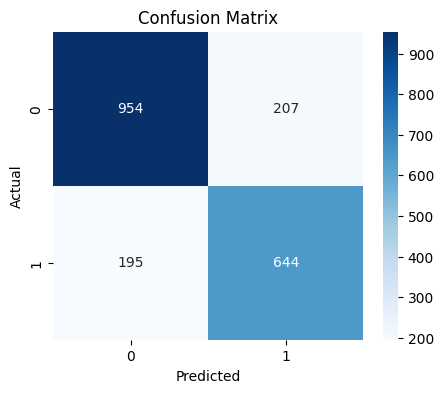

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [28]:
coef_df = pd.DataFrame({
    "Feature": final_features,
    "Coefficient": log_reg.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

coef_df


,Feature,Coefficient
0,AptitudeTestScore,0.709133
4,ExtracurricularActivities,0.465059
6,PlacementTraining,0.410735
1,Projects,0.332311
2,SoftSkillsRating,0.313825
3,CGPA,0.303405
5,Workshops/Certifications,0.143096
7,Internships,0.013033


## Baseline Logistic Regression Results

A logistic regression model was trained as a baseline classifier.

Key observations:
- Aptitude score and project experience have the strongest positive influence on placement probability.
- Soft skills and CGPA also contribute significantly.
- Internship count alone has a weaker effect.
- The model outputs calibrated probabilities suitable for estimating interview chances.

This baseline serves as a reference for more advanced models.
